## Project Steps
1. **Data Preprocessing**:
   - Handling missing values.
   - Encoding categorical variables.
   - Scaling numerical features.
   - Splitting the data into training and testing sets.

2. **Exploratory Data Analysis (EDA)**:
   - Statistical summaries.
   - Distribution of features.
   - Correlation analysis.
   - Visualization of relationships between features and target variable.

3. **Model Training**:
   - Utilizing various classifiers, including SVM with linear kernel.
   - Hyperparameter tuning using techniques like GridSearchCV.

4. **Model Evaluation**:
   - Calculating performance metrics such as precision, recall, F1-score.
   - Constructing confusion matrices.
   - Plotting ROC curves and Precision-Recall curves.

5. **Interpretation**:
   - Extracting classification rules from Decision Trees.
   - Analyzing feature weights from SVM with linear kernel.

# Heart Attack Prediciton

## Dataset
- **Source**: [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv)

## Data-Preprocessing

In [88]:
import pandas as pd
import numpy as np

heart_data = pd.read_csv('./archive/heart.csv')
print(heart_data.shape)
heart_data.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

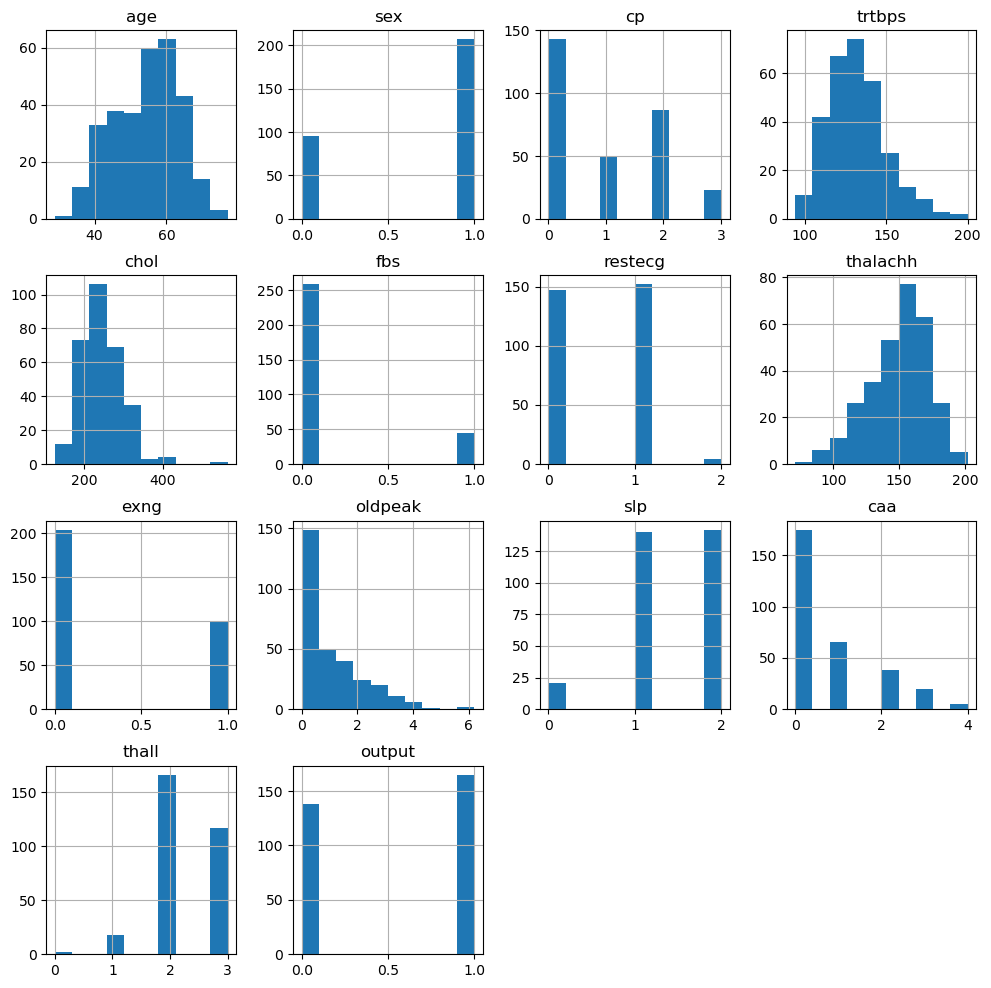

In [90]:
heart_data.hist(figsize=(12,12))

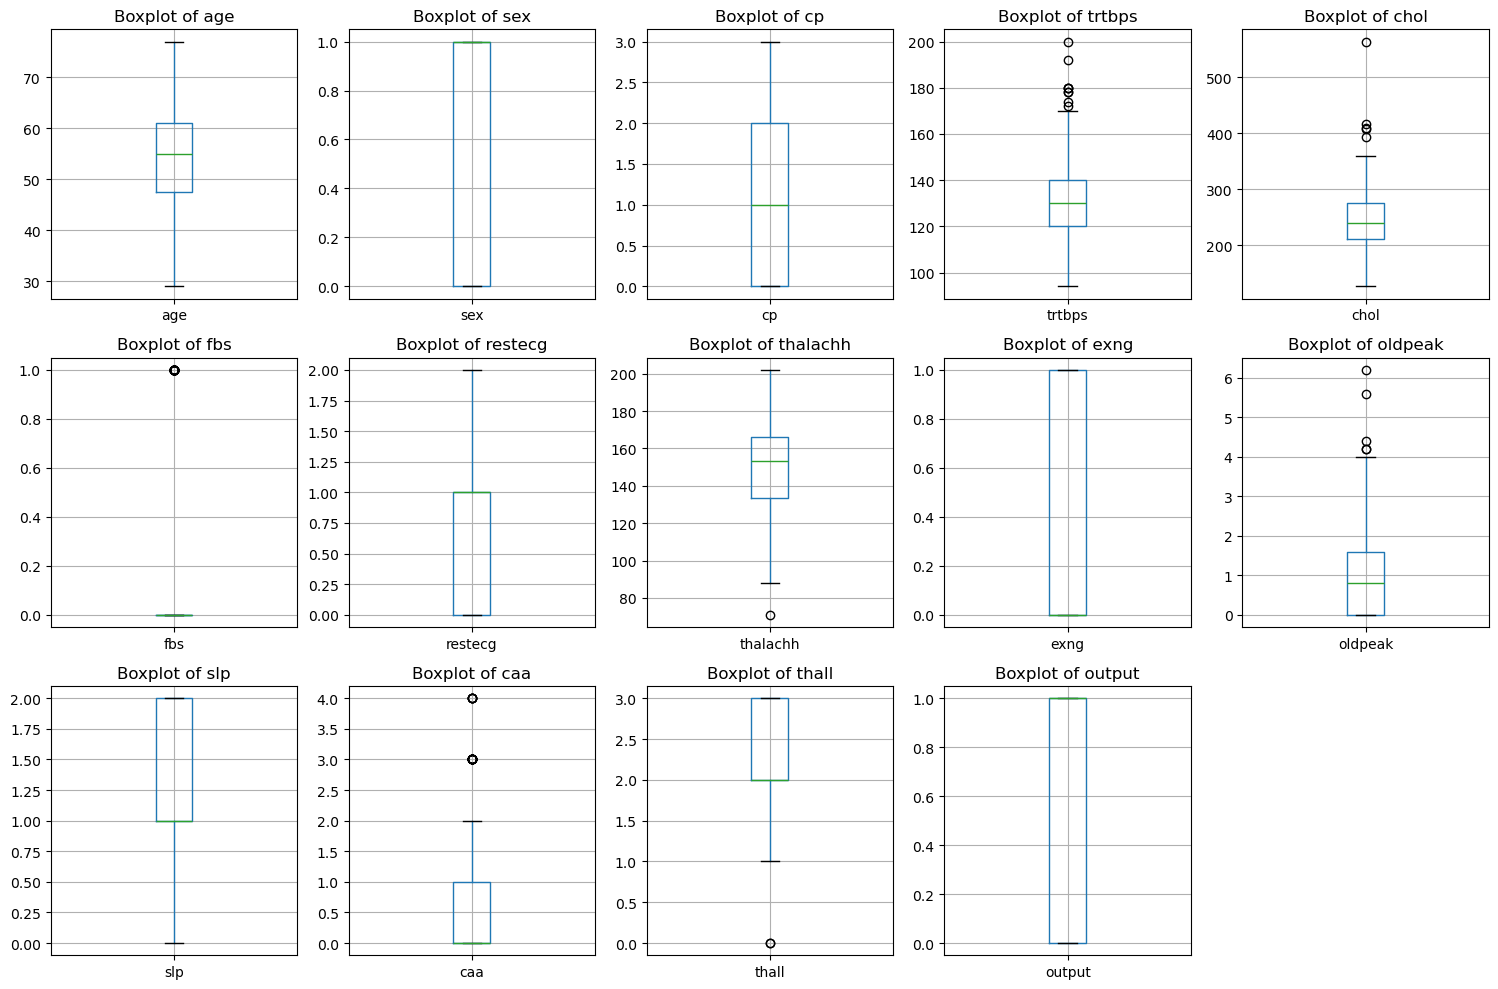

In [91]:
import matplotlib.pyplot as plt

def boxplot(X):
    num_columns = len(X.columns)

    # Determine the number of rows and columns for the subplots
    nrows = int(num_columns**0.5)
    ncols = int(num_columns / nrows) + (num_columns % nrows > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    axes = axes.flatten()

    for i, column in enumerate(X.columns):
        X.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f"Boxplot of {column}")

    # Remove any empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxplot(heart_data)

/home/eddie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eddie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eddie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eddie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

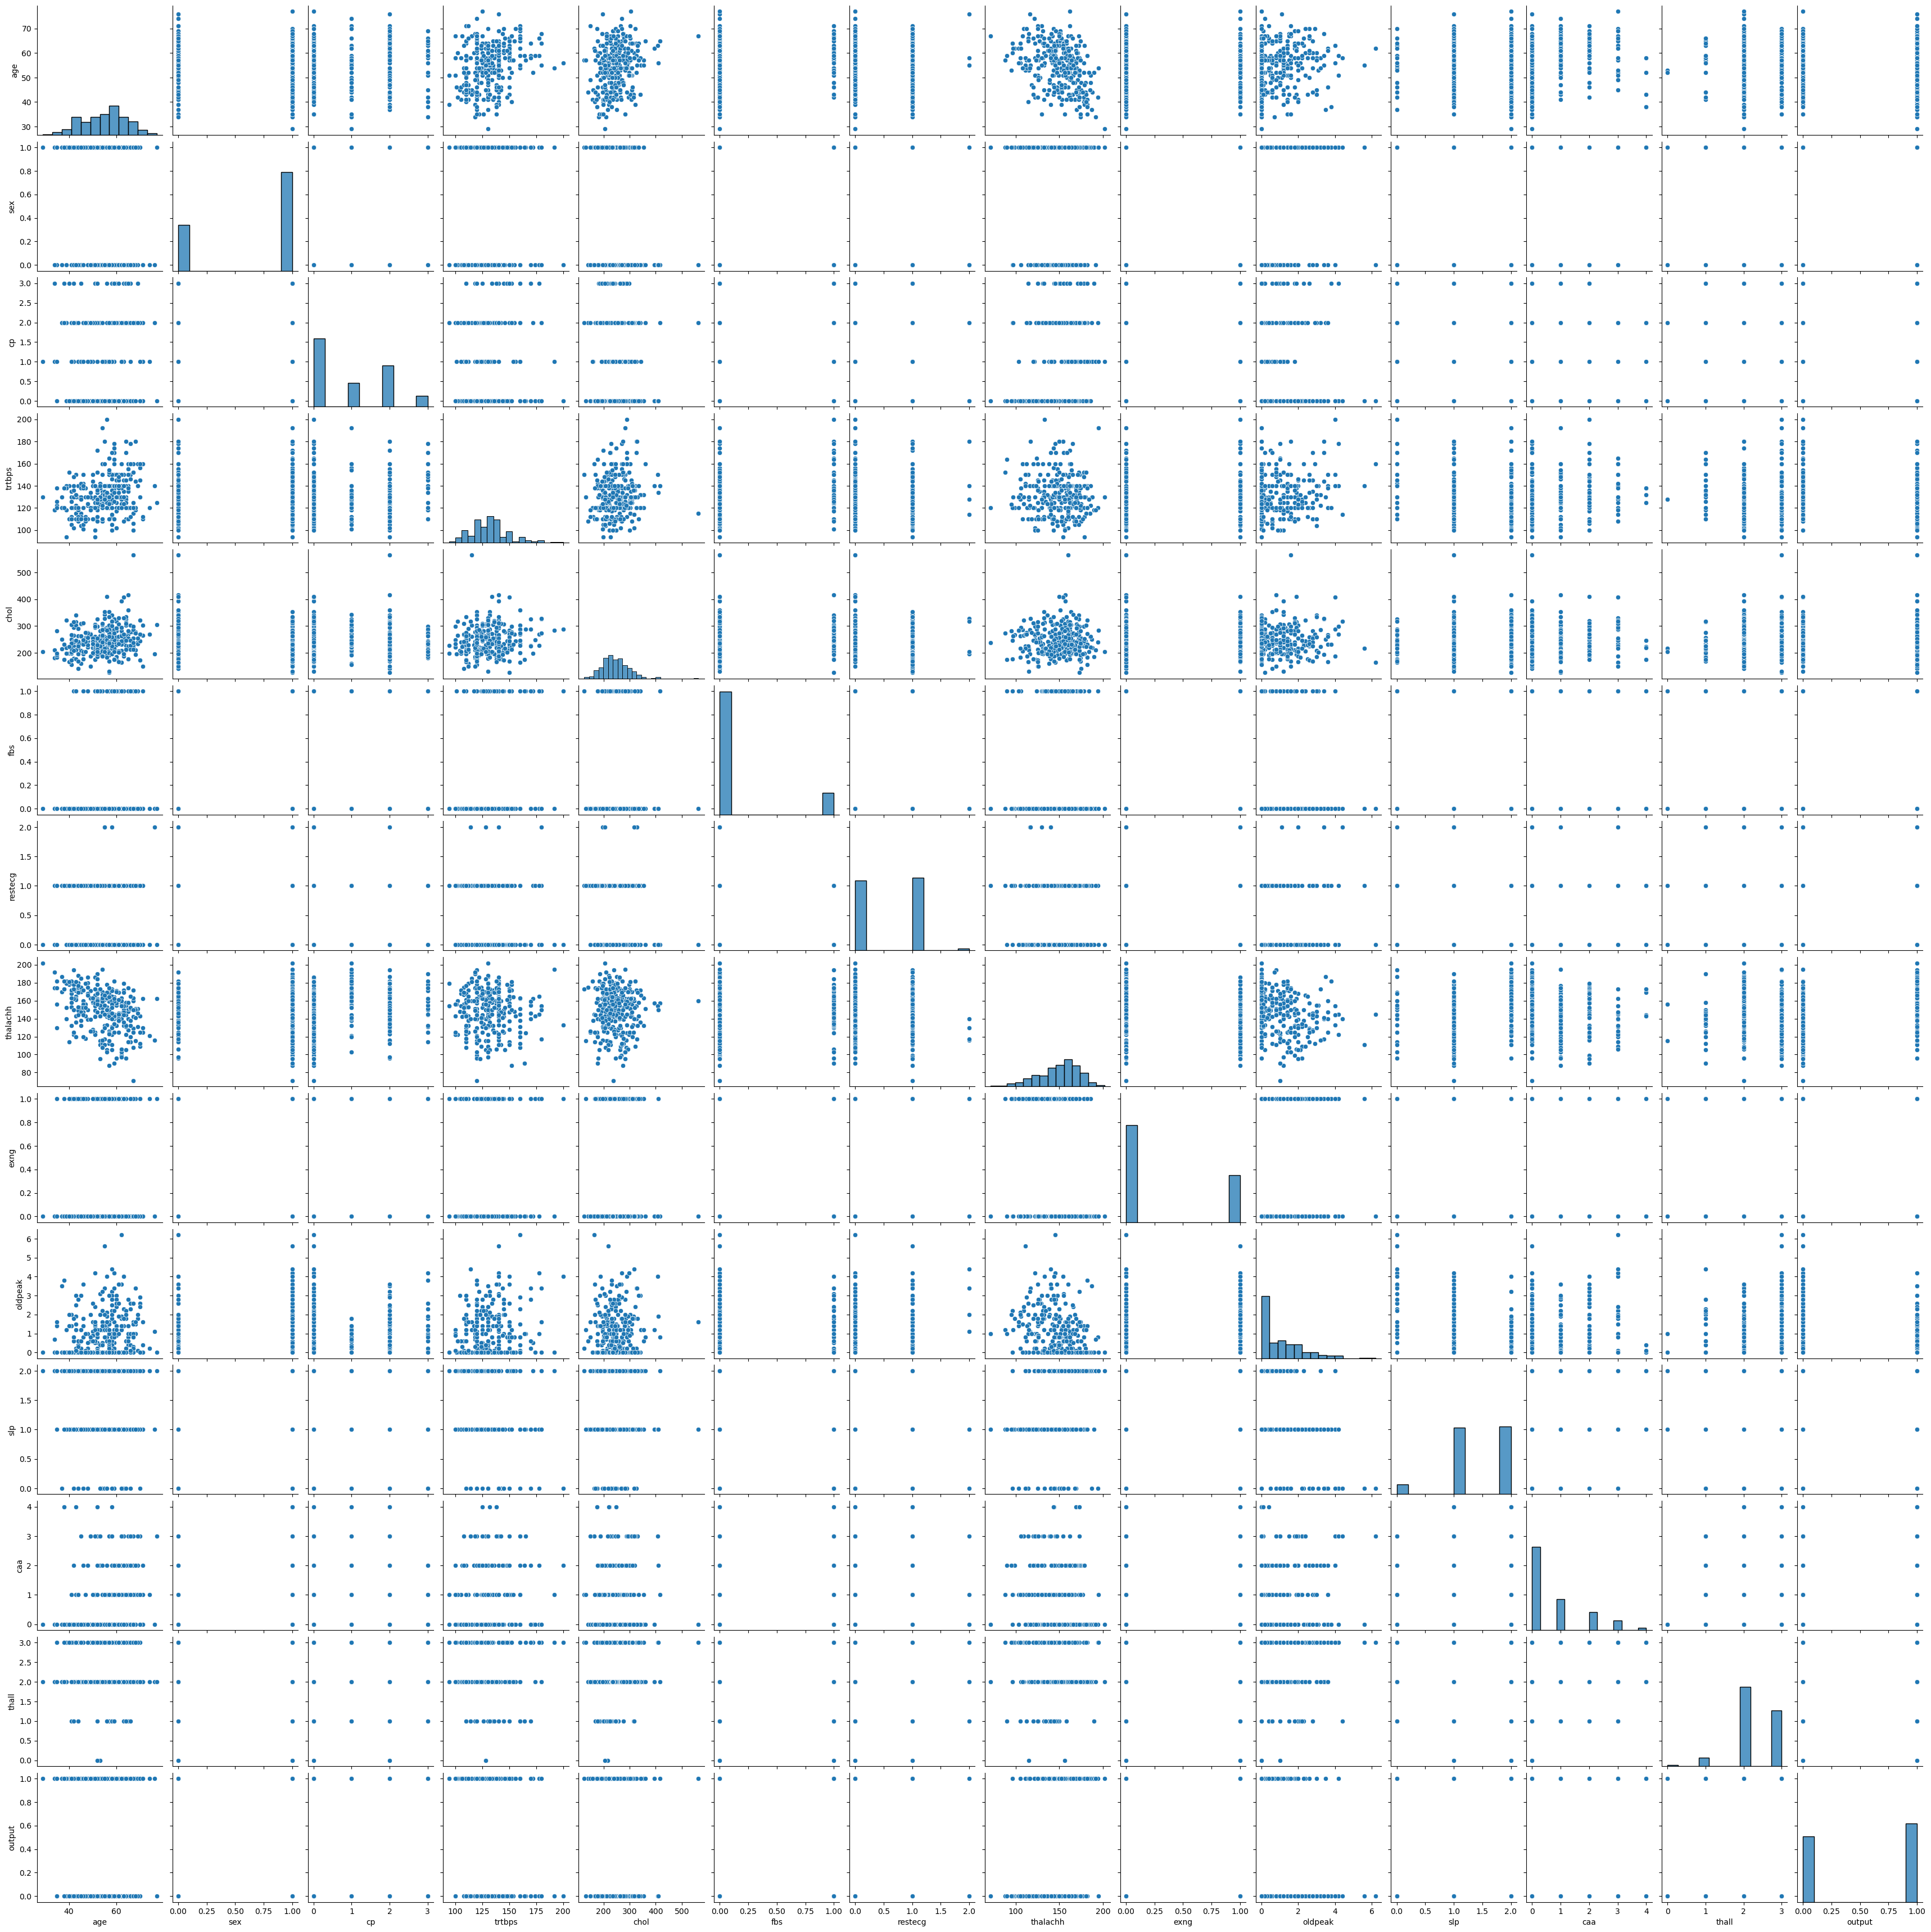

In [92]:
import seaborn as sns

sns.pairplot(heart_data)

In [93]:
from sklearn.model_selection import train_test_split
y = heart_data['output']
X = heart_data.drop(axis=1, columns='output')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=69)

In [94]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


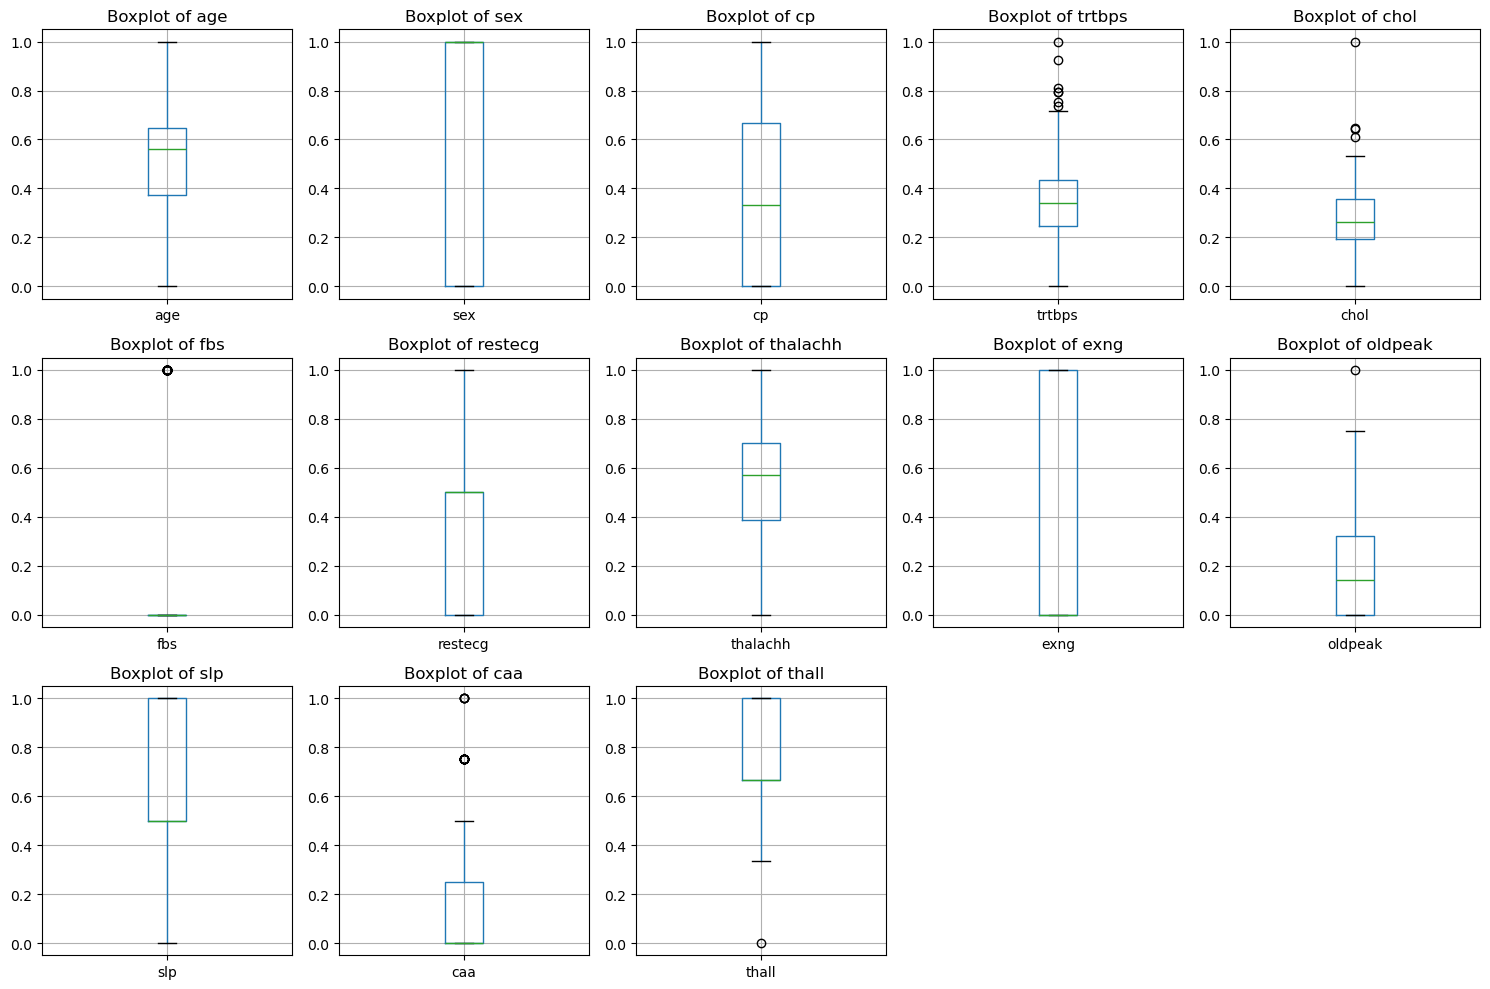

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

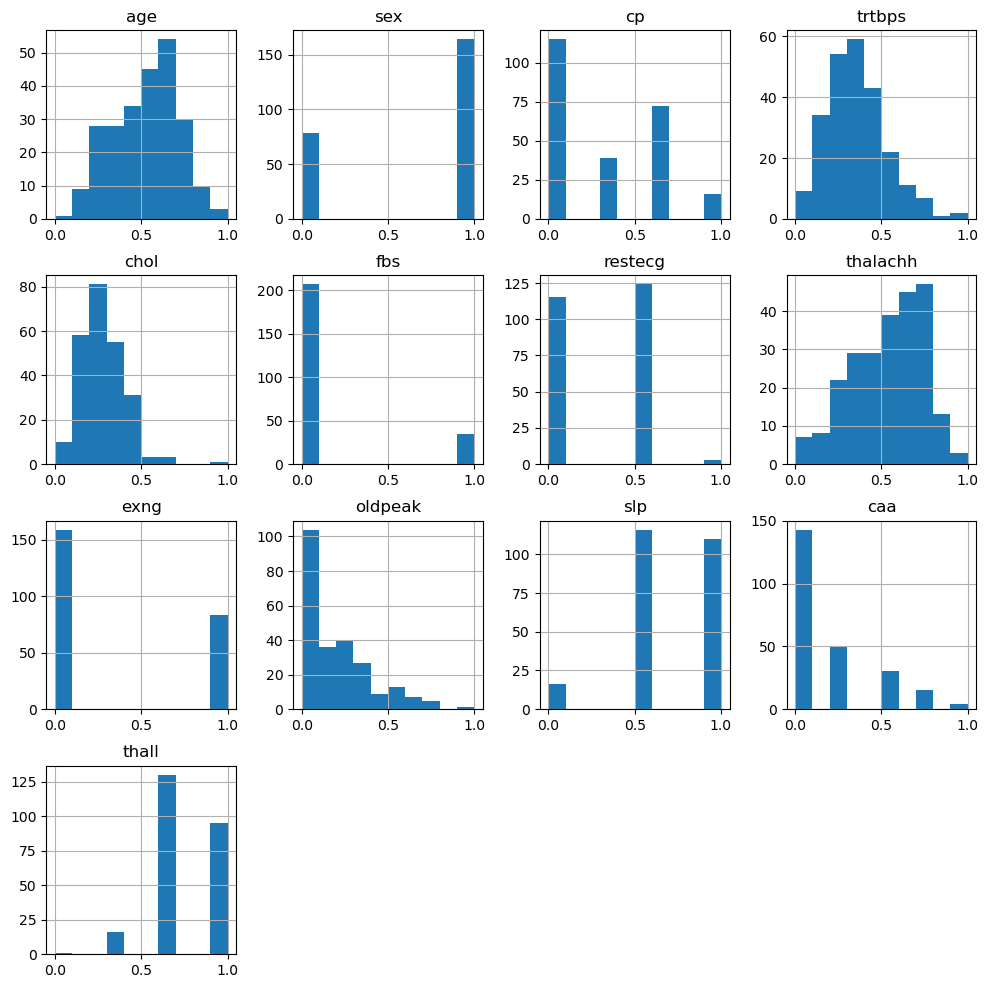

In [95]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

boxplot(X_train_scaled)
X_train_scaled.hist(figsize=(12,12))


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

svm_param_grid = {
    'C': [0.1, 1, 10, 100]
}

nb_pipeline = Pipeline([
    ('classifier', GaussianNB())
])

nb_param_grid = [
    {
        'classifier': [GaussianNB()],
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [1.0, 0.1, 0.01]
    },
    {
        'classifier': [BernoulliNB()],
        'classifier__alpha': [1.0, 0.1, 0.01],
        'classifier__binarize': [0.0, 0.5]
    }
]

dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50]
}

In [97]:
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [98]:
svm = SVC(kernel='linear')
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [99]:
nb = GaussianNB()
nb_grid_search = GridSearchCV(estimator=nb_pipeline, param_grid=nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', GaussianNB())]),
             param_grid=[{'classifier': [GaussianNB()],
                          'classifier__var_smoothing': [1e-09, 1e-08, 1e-07]},
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [1.0, 0.1, 0.01]},
                         {'classifier': [BernoulliNB()],
                          'classifier__alpha': [1.0, 0.1, 0.01],
                          'classifier__binarize': [0.0, 0.5]}],
             scoring='accuracy')

In [100]:
dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50]},
             scoring='accuracy')

In [101]:
from sklearn.metrics import accuracy_score

print(f"KNN Best parameters: {knn_grid_search.best_params_}")
knn_best_model = knn_grid_search.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, knn_y_pred)}")
 
print(f"SVM Best parameters: {svm_grid_search.best_params_}")
svm_best_model = svm_grid_search.best_estimator_
svm_y_pred = svm_best_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_y_pred)}")
 
print(f"Naive Bayes Best parameters: {nb_grid_search.best_params_['classifier'].__class__.__name__}")
nb_best_model = nb_grid_search.best_estimator_
nb_y_pred = nb_best_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_y_pred)}")
 
print(f"Decision Tree Best parameters: {dt_grid_search.best_params_}")
dt_best_model = dt_grid_search.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_y_pred)}")

KNN Best parameters: {'n_neighbors': 5}
KNN Accuracy: 0.5573770491803278
SVM Best parameters: {'C': 100}
SVM Accuracy: 0.45901639344262296
Naive Bayes Best parameters: GaussianNB
Naive Bayes Accuracy: 0.5245901639344263
Decision Tree Best parameters: {'max_depth': 50}
Decision Tree Accuracy: 0.4918032786885246


In [102]:



pipelines = [
    ('KNN', knn_grid_search.best_estimator_),
    ('SVM', svm_grid_search.best_estimator_),
    ('Naive Bayes', nb_grid_search.best_estimator_),
    ('Decision Tree', dt_grid_search.best_estimator_)
]

In [103]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

def evaluate_classifier(clf, X_test, y_test, name, roc_data, prc_data):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    
    print(f"{name} Classification Report")

    # Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Weighted F1 Score: {f1:.4f}")
    print(f"{name} ROC AUC Score: {roc_auc:.4f}")
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    # Precision-Recall Data
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    prc_data[name] = (precision, recall)
    
    # ROC Data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

def evaluate_and_collect_data(pipelines, X_test, y_test):
    roc_data = {}
    prc_data = {}
    
    for name, clf in pipelines:
        evaluate_classifier(clf, X_test, y_test, name, roc_data, prc_data)
    
    return roc_data, prc_data


In [104]:
def plot_combined_roc_curve(roc_data):
    plt.figure(figsize=(12, 8))
    for name, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_combined_prc_curve(prc_data):
    plt.figure(figsize=(12, 8))
    for name, (precision, recall) in prc_data.items():
        plt.plot(recall, precision, label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Combined Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()


KNN Classification Report
KNN Accuracy: 0.7869
KNN Weighted F1 Score: 0.7855
KNN ROC AUC Score: 0.8582


<Figure size 800x600 with 0 Axes>

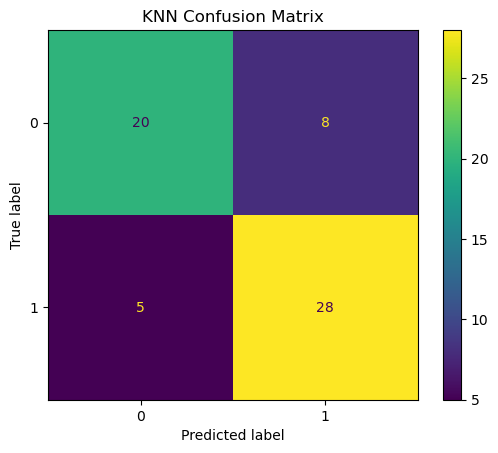

SVM Classification Report
SVM Accuracy: 0.8197
SVM Weighted F1 Score: 0.8172
SVM ROC AUC Score: 0.8885


<Figure size 800x600 with 0 Axes>

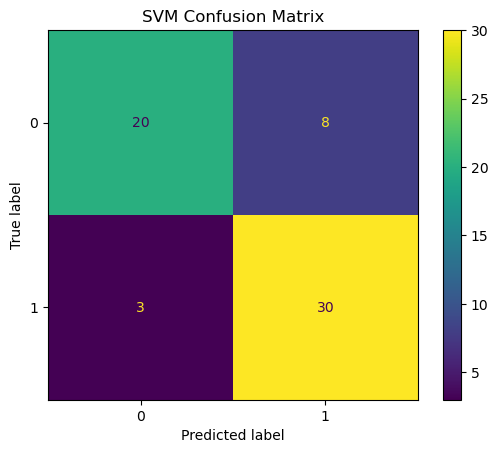

Naive Bayes Classification Report
Naive Bayes Accuracy: 0.8197
Naive Bayes Weighted F1 Score: 0.8172
Naive Bayes ROC AUC Score: 0.8799


<Figure size 800x600 with 0 Axes>

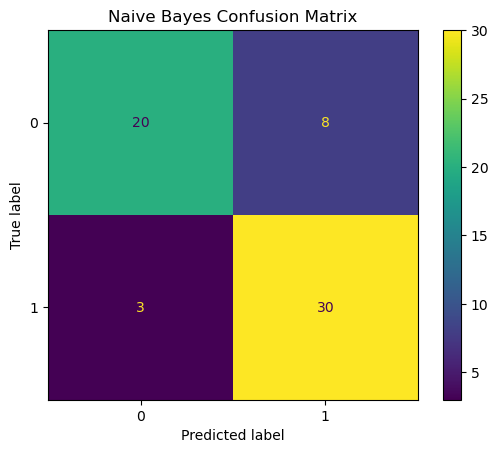

Decision Tree Classification Report
Decision Tree Accuracy: 0.7213
Decision Tree Weighted F1 Score: 0.7216
Decision Tree ROC AUC Score: 0.7208


<Figure size 800x600 with 0 Axes>

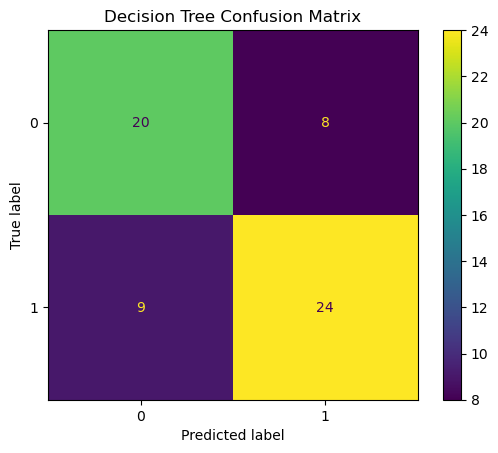

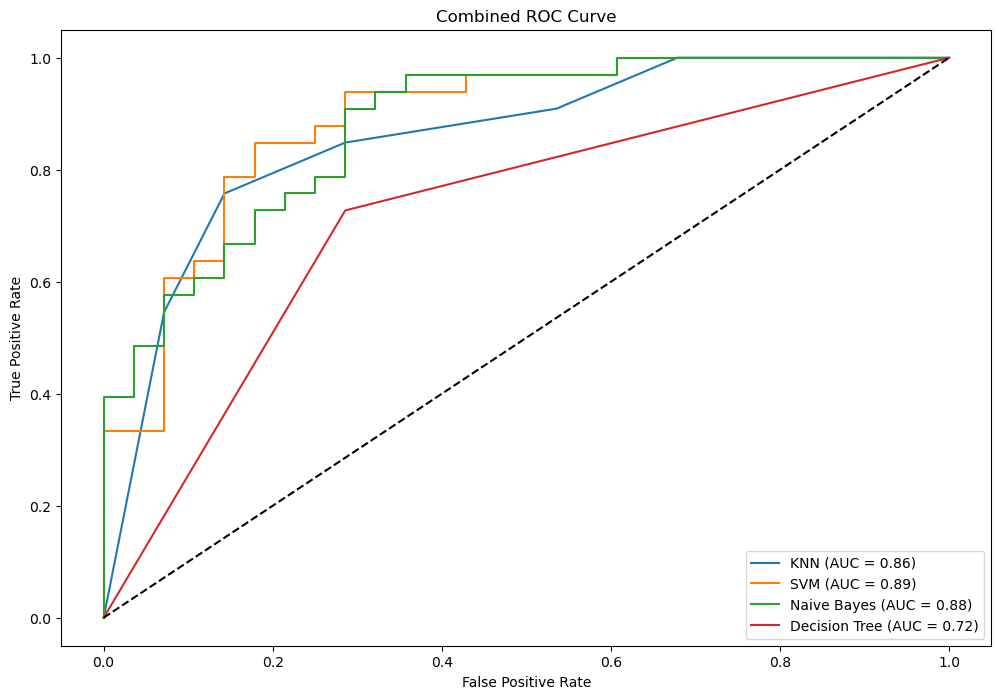

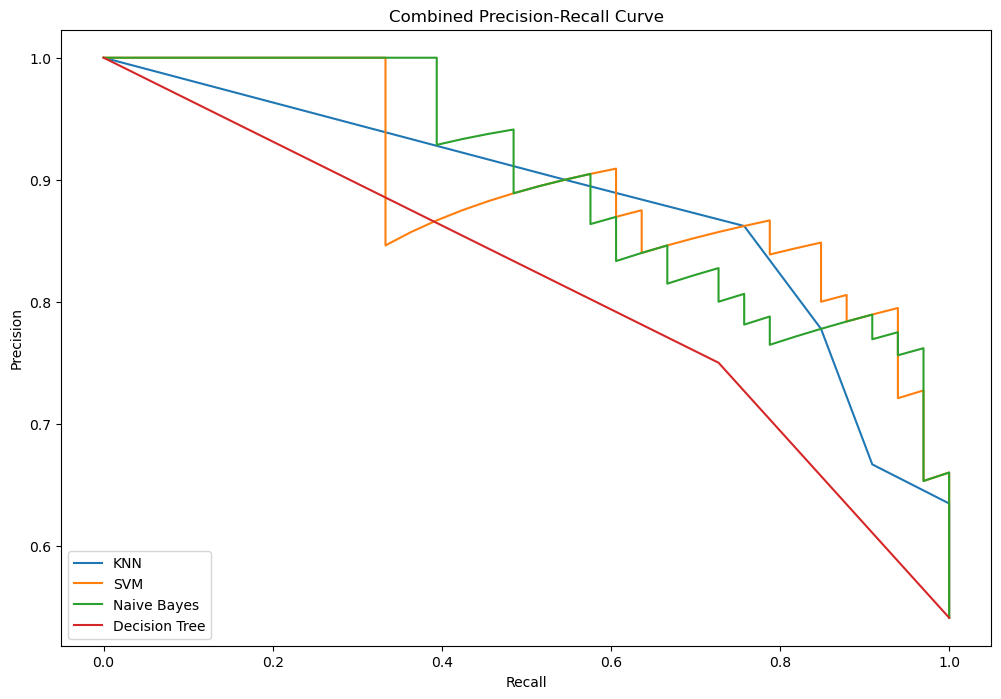

In [105]:
# Evaluate and collect data
roc_data, prc_data = evaluate_and_collect_data(pipelines, X_test_scaled, y_test)

# Plot combined ROC and Precision-Recall curves
plot_combined_roc_curve(roc_data)
plot_combined_prc_curve(prc_data)

In [112]:
feature_importances = svm_grid_search.best_estimator_.coef_[0]
intercept = svm_grid_search.best_estimator_.intercept_[0]
df_feature_importances = pd.DataFrame({
    'Feature': X_test_scaled.columns,
    'Importance': feature_importances
})
print(f"Intercept: {intercept:.4f}")
df_feature_importances

Intercept: 2.8484


,Feature,Importance
0,age,-0.021985
1,sex,-0.851444
2,cp,1.882572
3,trtbps,-2.215684
4,chol,-1.143750
5,fbs,-0.004818
6,restecg,0.686922
7,thalachh,2.236405
8,exng,-0.731400
9,oldpeak,-2.426703


In [117]:
from sklearn.tree import export_text, plot_tree

rules = export_text(dt_grid_search.best_estimator_, feature_names=list(X_train_scaled.columns))
print(rules)

|--- cp <= 0.17
|   |--- caa <= 0.12
|   |   |--- exng <= 0.50
|   |   |   |--- thall <= 0.83
|   |   |   |   |--- chol <= 0.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  0.43
|   |   |   |   |   |--- trtbps <= 0.39
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- trtbps >  0.39
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- thall >  0.83
|   |   |   |   |--- age <= 0.53
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  0.53
|   |   |   |   |   |--- class: 1
|   |   |--- exng >  0.50
|   |   |   |--- thalachh <= 0.52
|   |   |   |   |--- trtbps <= 0.20
|   |   |   |   |   |--- oldpeak <= 0.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- oldpeak >  0.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- trtbps >  0.20
|   |   |   |   |   |--- slp <= 0.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- slp >  0.75
|   |   |   |   |   |   |--- age <= 0.55
|   |   |   |   |   |   |   |--- class: 

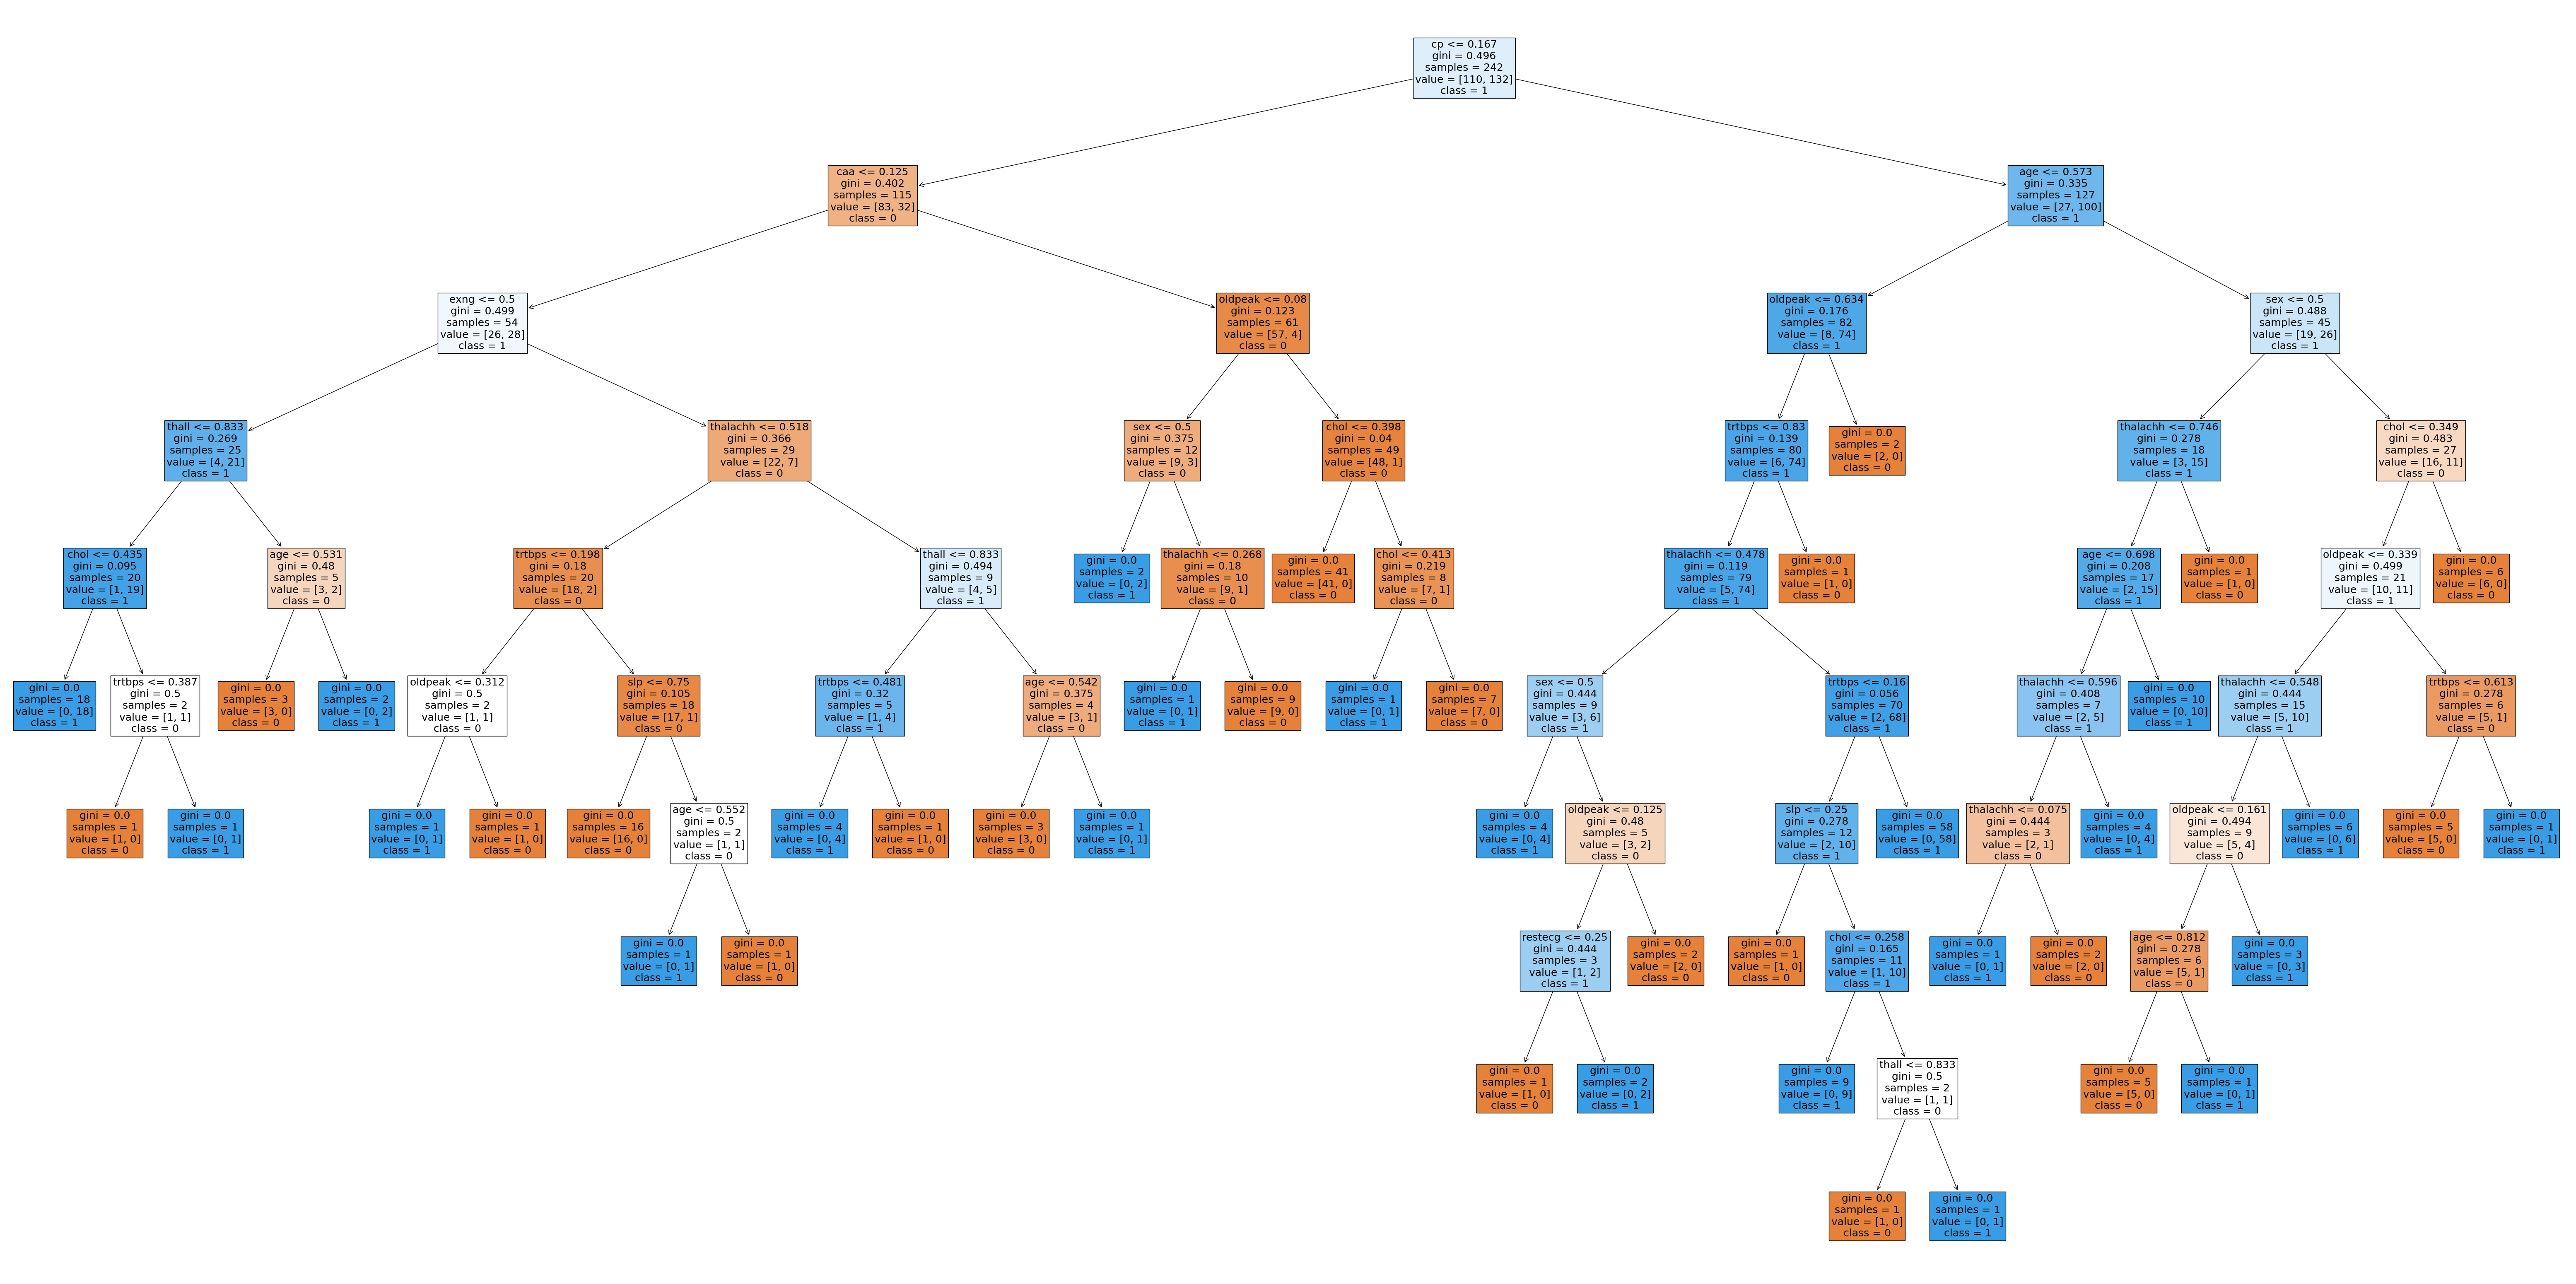

In [126]:
plt.figure(figsize=(80,40))
plot_tree(dt_grid_search.best_estimator_, feature_names=X_train_scaled.columns, class_names=['0','1'], filled=True, fontsize=18)
plt.savefig('dt.png')
